### Notebook Overview

This notebook demonstrates fundamental concepts in statistics, particularly related to sampling and statistical inference:

1.  **Law of Large Numbers (LLN)**: Illustrated by showing how the sample mean converges to the true population mean as the sample size increases.
2.  **Central Limit Theorem (CLT)**: Demonstrated by visualizing the sampling distribution of sample means, which tends towards a normal distribution regardless of the population's distribution.
3.  **Confidence Intervals**: Calculation of a single confidence interval and a simulation to show the proportion of confidence intervals that capture the true population mean, highlighting the frequentist interpretation of confidence levels.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a large population with a uniform distribution between 50 and 90
population = np.random.uniform(50, 90, 100000)
# Calculate the true mean of the population
true_mean = np.mean(population)
print('true population mean', true_mean)

true population mean 69.99086433562398


In [14]:
# Take a random sample of 50 elements from the population
sample = np.random.choice(population, 50)
# Calculate the mean of the sample
sample_mean = np.mean(sample)
# Calculate the variance of the sample
sample_var = np.var(sample)
print('sample mean', sample_mean)
print('sample variance', sample_var)

sample mean 70.80501679352871
sample variance 115.20498948382729


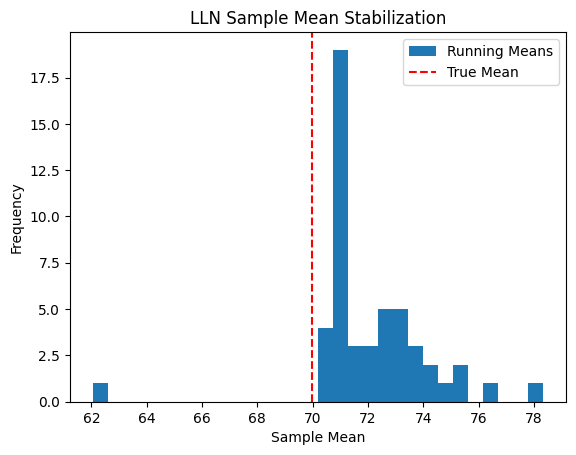

In [15]:
# Calculate the running mean (cumulative mean) of the sample
# This demonstrates the Law of Large Numbers
running_mean = np.cumsum(sample) / np.arange(1, 51)

# Plot a histogram of the running means
plt.hist(running_mean, bins=30, label='Running Means')
# Add a vertical line at the true population mean for comparison
plt.axvline(true_mean, color='r', linestyle='--', label='True Mean')
plt.title('LLN Sample Mean Stabilization')l
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

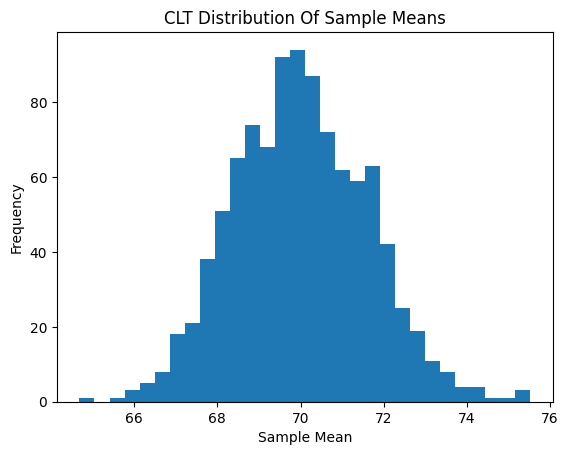

In [20]:
sample_means = []
# Simulate taking 1000 samples and calculating their means
# This demonstrates the Central Limit Theorem
for _ in range(1000):
    s = np.random.choice(population, 50)
    sample_means.append(np.mean(s))

# Plot a histogram of the sample means
plt.hist(sample_means, bins=30)
plt.title('CLT Distribution Of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Calculate a single confidence interval for the sample mean
mean = sample_mean
std = np.std(sample)
# Z-score for a 95% confidence interval
z = 1.96

# Calculate the margin of error
margin = z * std / np.sqrt(len(sample))
# Calculate the upper bound of the confidence interval
upper = mean + margin
# Calculate the lower bound of the confidence interval
lower = mean - margin # Fixed: Changed + to - for lower bound
print('Confidence Interval: (', lower, ',', upper, ')')
# Check if the true population mean falls within this confidence interval
print('Does it contain true mean', lower <= true_mean <= upper)

Confidence Interval: ( 67.82988154416249 , 73.78015204289493 )
Does it contain true mean True


In [18]:
count = 0
trials = 1000

# Simulate generating 1000 confidence intervals and check how many contain the true mean
for _ in range(trials):
    # Take a new sample for each trial
    Sample = np.random.choice(population, 50)
    Mean = np.mean(Sample)
    Std = np.std(Sample)

    # Calculate the margin of error for a 95% CI
    Margin = 1.96 * (Std / np.sqrt(len(Sample)))

    # Calculate the lower and upper bounds of the confidence interval
    Lower = Mean - Margin
    Upper = Mean + Margin

    # Check if the true population mean is within the calculated interval
    if Lower <= true_mean <= Upper:
        count += 1

# Print the proportion of confidence intervals that captured the true mean
print("Proportion containing true mean:", count / trials)

Proportion containing true mean: 0.946


### Summary of Statistical Concepts Demonstrated

This notebook effectively illustrates several core statistical principles:

*   **Law of Large Numbers (LLN)**: Through the running mean plot, we observed that as the sample size from a population increases, the sample mean converges towards the true population mean. This shows how larger samples provide more accurate estimates of population parameters.

*   **Central Limit Theorem (CLT)**: The histogram of sample means clearly demonstrated that the distribution of sample means, taken from a non-normal population, approximates a normal distribution as the number of samples increases. This normal distribution is centered around the true population mean, and its spread is inversely related to the sample size.

*   **Confidence Intervals**: We calculated a single confidence interval for a sample mean and saw that it successfully captured the true population mean. Furthermore, a simulation confirmed the frequentist interpretation of confidence levels: approximately 95% of the 95% confidence intervals constructed from different samples indeed contained the true population mean. This highlights the reliability of confidence intervals in estimating population parameters.